In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv("kidney_disease.csv")

## Step 1: Exploratory Data Analysis (EDA)

In [4]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [5]:
df.classification.value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [6]:
# Rename columns for easier access
df.columns = ['id','age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 
              'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 
              'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 
              'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 
              'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class'] # renaming columns

In [7]:
df.shape

(400, 26)

In [8]:
df.describe()

id         age  blood_pressure  specific_gravity     albumin  \
count  400.000000  391.000000      388.000000        353.000000  354.000000   
mean   199.500000   51.483376       76.469072          1.017408    1.016949   
std    115.614301   17.169714       13.683637          0.005717    1.352679   
min      0.000000    2.000000       50.000000          1.005000    0.000000   
25%     99.750000   42.000000       70.000000          1.010000    0.000000   
50%    199.500000   55.000000       80.000000          1.020000    0.000000   
75%    299.250000   64.500000       80.000000          1.020000    2.000000   
max    399.000000   90.000000      180.000000          1.025000    5.000000   

            sugar  blood_glucose_random  blood_urea  serum_creatinine  \
count  351.000000            356.000000  381.000000        383.000000   
mean     0.450142            148.036517   57.425722          3.072454   
std      1.099191             79.281714   50.503006          5.741126   
min      0.000000             22.000000    1.500000          0.400000   
25%      0.000000             99.000000   27.000000          0.900000   
50%      0.000000            121.000000   42.000000          1.300000   
75%      0.000000            163.000000   66.000000          2.800000   
max      5.000000            490.000000  391.000000         76.000000   

           sodium   potassium  haemoglobin  
count  313.000000  312.000000   348.000000  
mean   137.528754    4.627244    12.526437  
std     10.408752    3.193904     2.912587  
min      4.500000    2.500000     3.100000  
25%    135.000000    3.800000    10.300000  
50%    138.000000    4.400000    12.650000  
75%    142.000000    4.900000    15.000000  
max    163.000000   47.000000    17.800000

In [9]:
df.drop('id',axis=1, inplace=True)

In [10]:
df.shape

(400, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [12]:
df['packed_cell_volume']= pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count']= pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']= pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [17]:
cat_cols= [col for col in df.columns if df[col].dtype == 'object' ]
num_cols= [col for col in df.columns if df[col].dtype != 'object' ]



In [19]:
len(num_cols)+len(cat_cols)

25

In [20]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [25]:
# Data cleaning
df['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['class'].replace({'ckd\t':'ckd','\notckd':'not ckd',},inplace=True)

In [26]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'notckd']


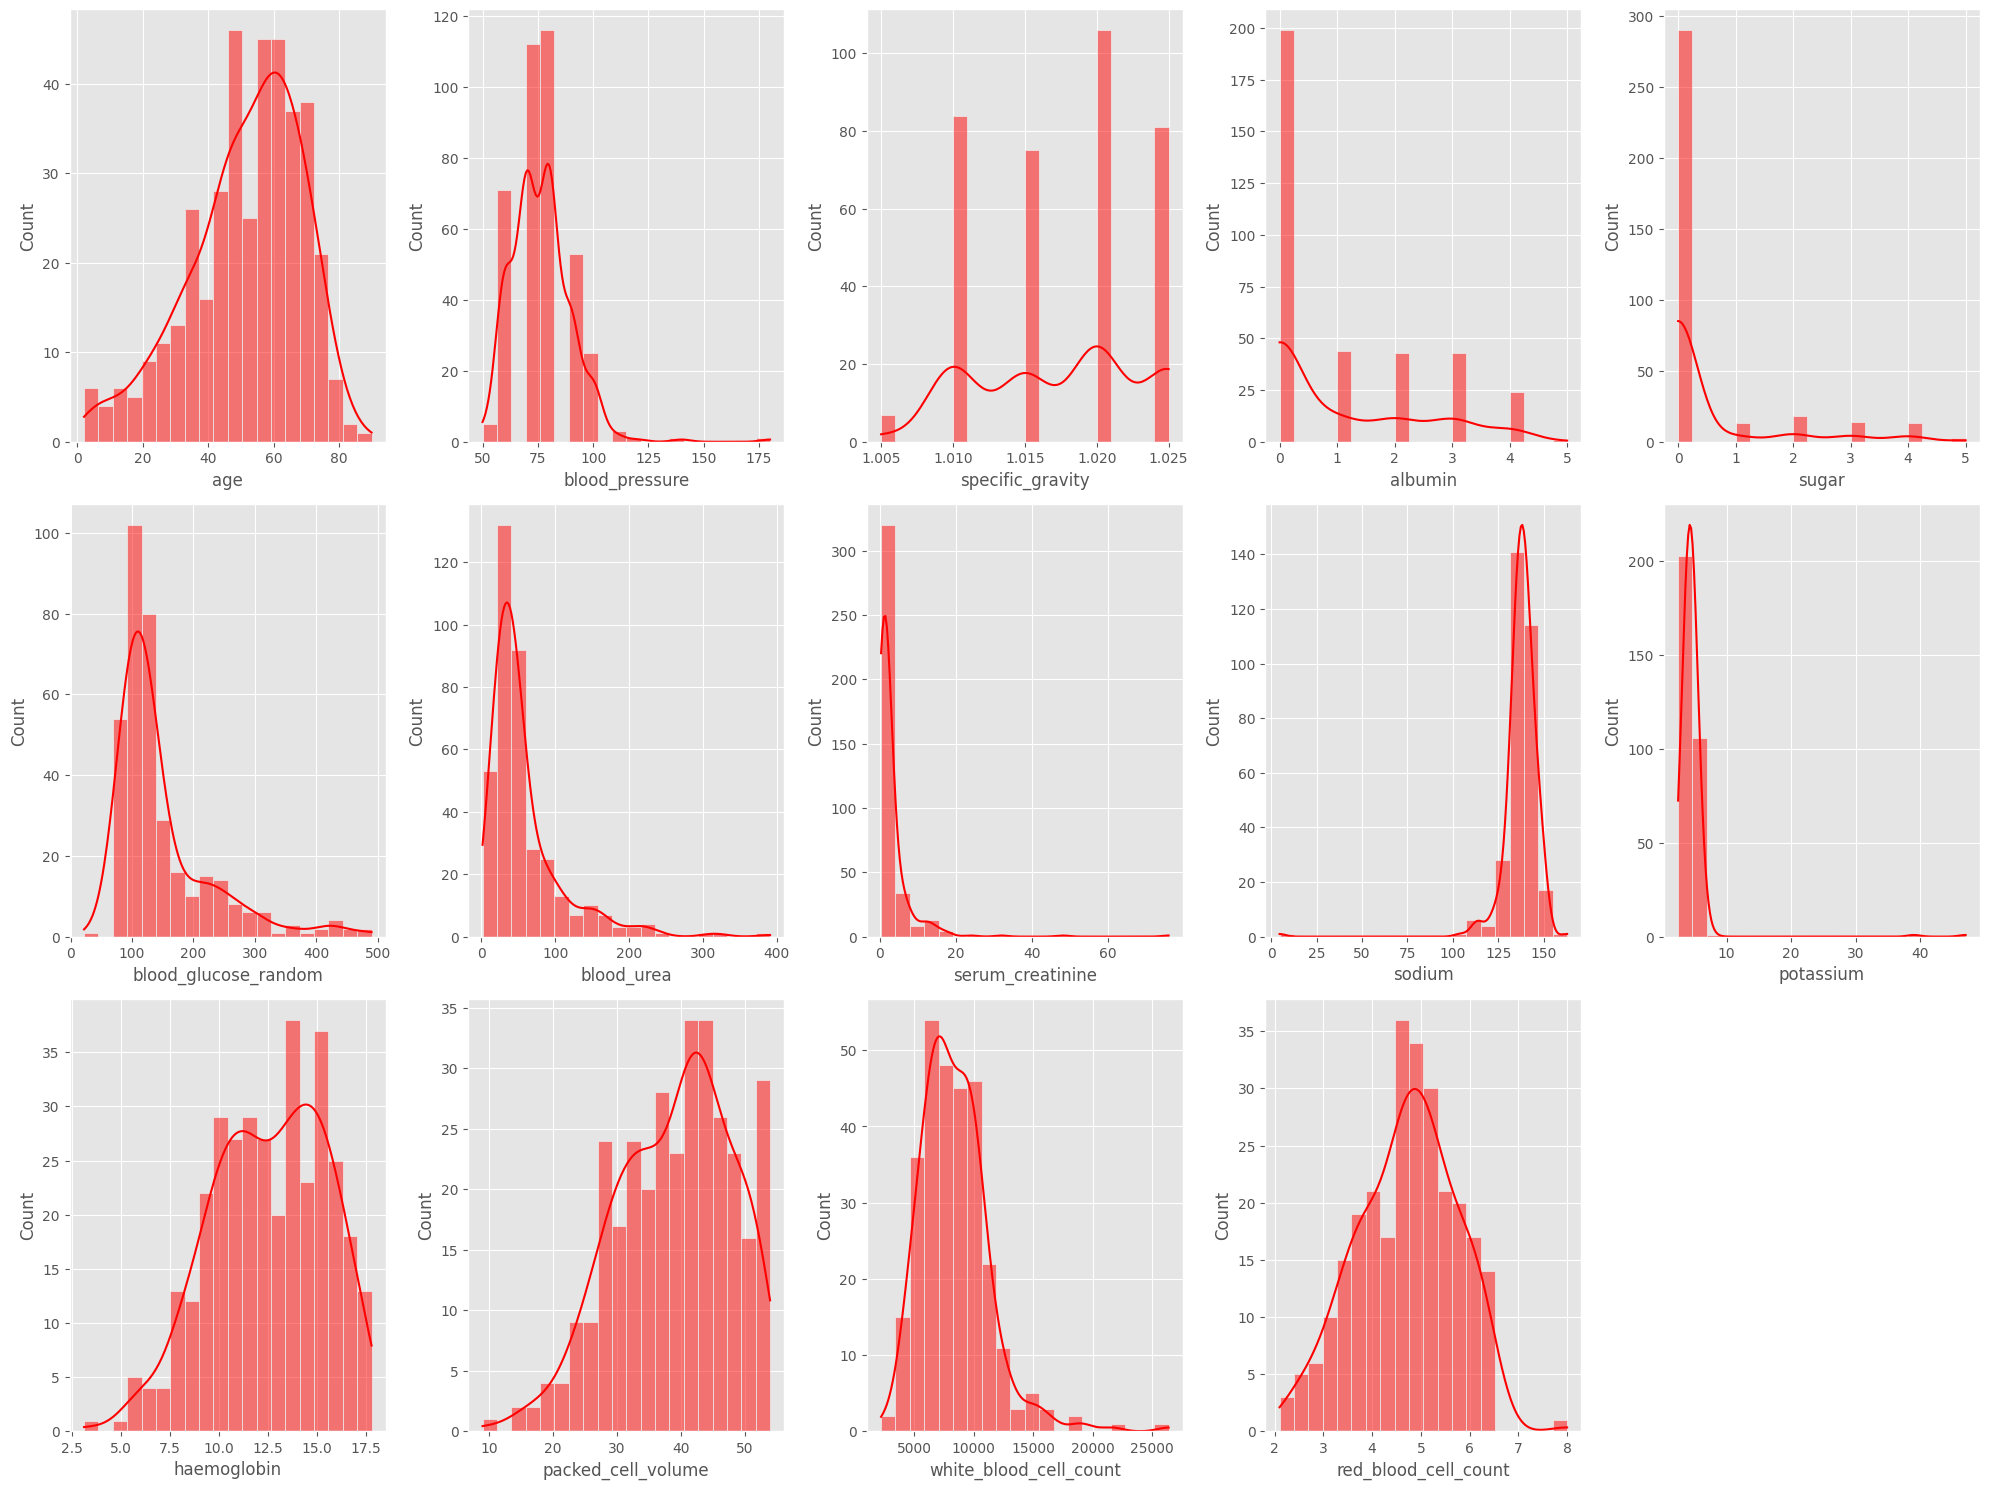

In [24]:
plt.figure(figsize=(20,15))
pt=1

for column in num_cols:
    ax= plt.subplot(3,5,pt)
    sns.histplot(df[column],bins=20,ax=ax, kde= True, color='red')
    ax.set_xlabel(column)
    pt+=1
plt.tight_layout()
plt.show()

In [27]:
from scipy.stats import shapiro
normality_results={}

for column in num_cols:
    clean_data= df[column].dropna()
    shapiro_test, p_value= shapiro(clean_data)
    normality_results[col]= p_value
    print(f"{column}: sw={shapiro_test}, p-value={p_value}")

age: sw=0.9639029114889367, p-value=3.155049297644778e-08
blood_pressure: sw=0.8681503490559113, p-value=1.2313409228428595e-17
specific_gravity: sw=0.8816577276410376, p-value=7.511105213426834e-16
albumin: sw=0.7447639123762586, p-value=5.505137709775377e-23
sugar: sw=0.4680796812968995, p-value=5.4171833666879725e-31
blood_glucose_random: sw=0.7678639193161365, p-value=4.309587713071842e-22
blood_urea: sw=0.7222726556799595, p-value=1.0721529229554324e-24
serum_creatinine: sw=0.3977923839939804, p-value=1.0443480469097894e-33
sodium: sw=0.6051863300448135, p-value=3.7410576559410765e-26
potassium: sw=0.2012289249964233, p-value=2.4627358176265627e-34
haemoglobin: sw=0.9798545767460272, p-value=8.645817119903378e-05
packed_cell_volume: sw=0.9726775249351948, p-value=6.924159381988391e-06
white_blood_cell_count: sw=0.9041545424931915, p-value=1.018745531899288e-12
red_blood_cell_count: sw=0.9880041466200636, p-value=0.024666552196570993


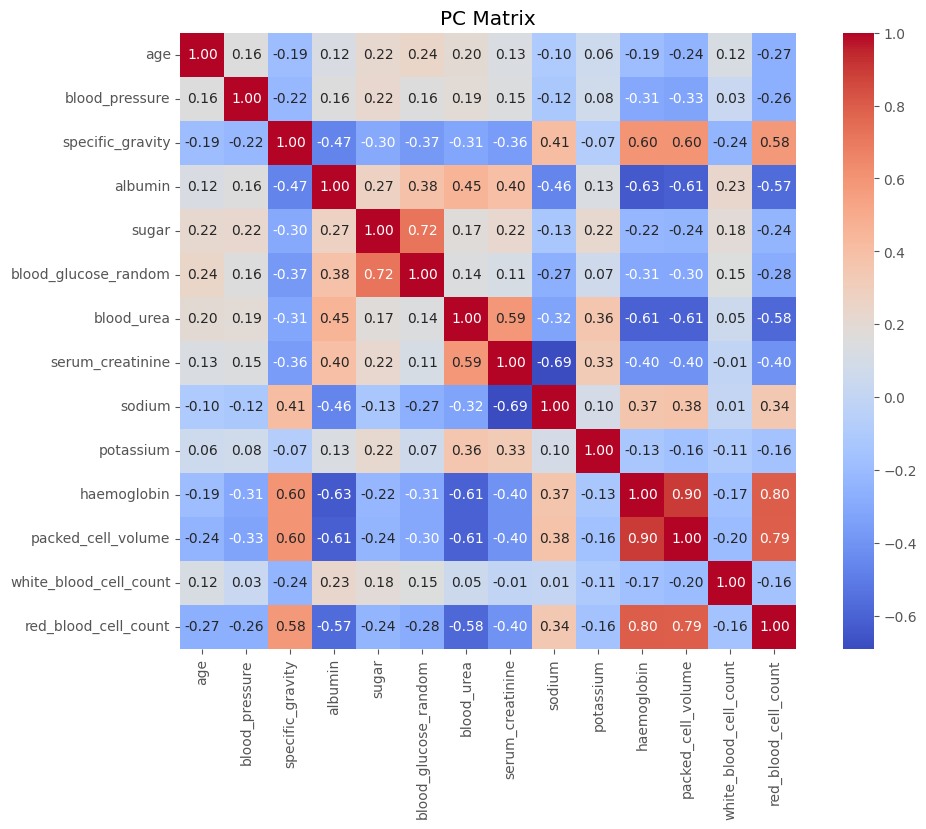

In [28]:
#pearson correlation 
pearson_corr= df[num_cols].corr(method='pearson')
plt.figure(figsize=(12,8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f",cmap='coolwarm',square=True)
plt.title("PC Matrix")
plt.show()

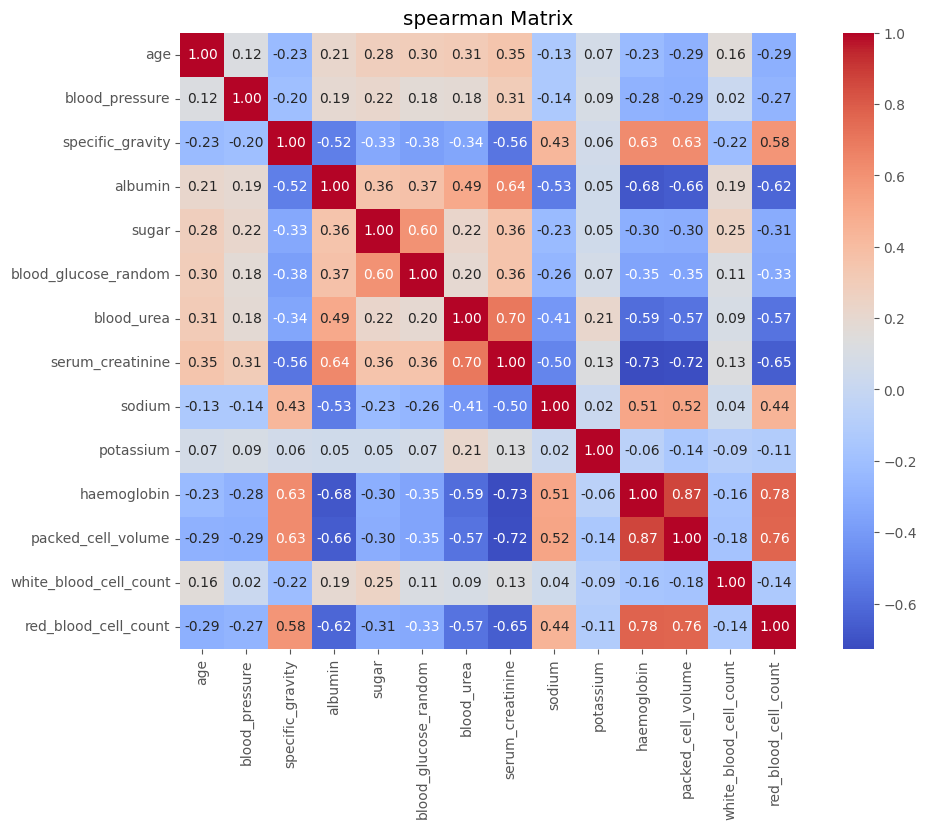

In [29]:
#pearson correlation 
pearson_corr= df[num_cols].corr(method='spearman')
plt.figure(figsize=(12,8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f",cmap='coolwarm',square=True)
plt.title("spearman Matrix")
plt.show()

In [31]:
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [36]:
num_cols_length%3

2

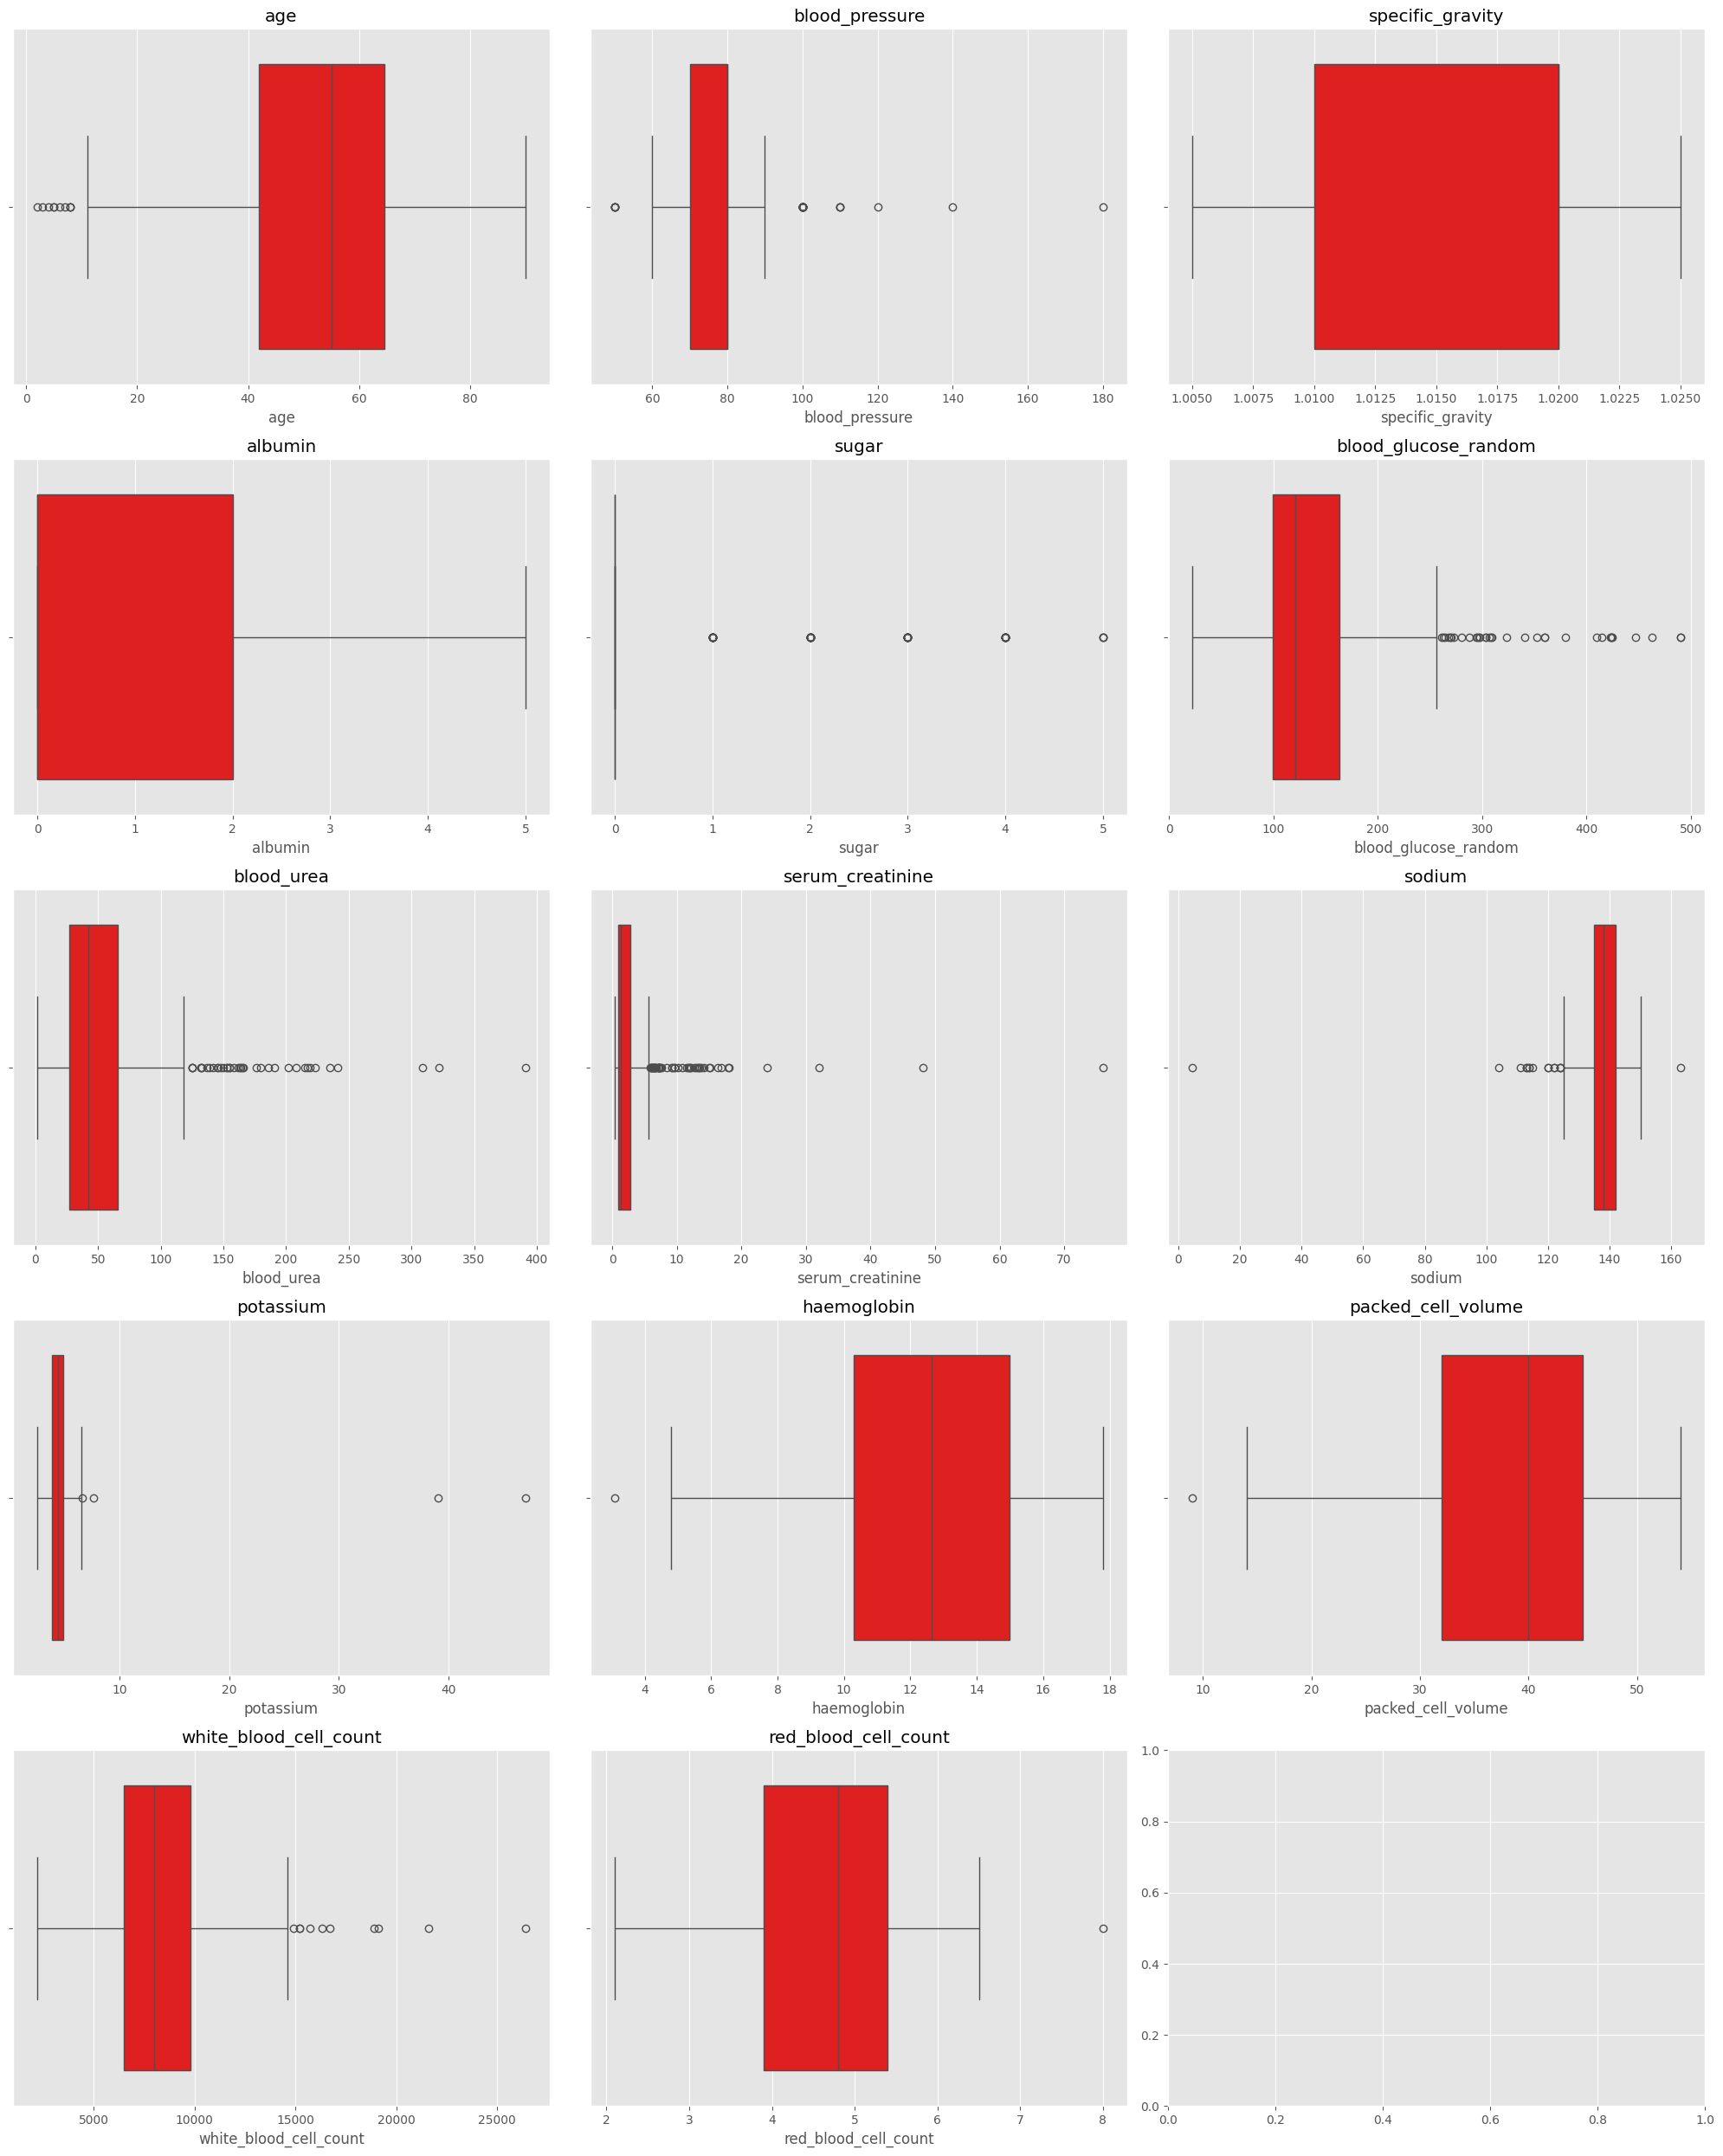

In [40]:
## Outlier Detection
num_cols_length= len(num_cols)
n_rows= (num_cols_length//3) + (num_cols_length % 3 > 0) 

fig, axes= plt.subplots(n_rows,3, figsize=(20, n_rows*5))

axes= axes.flatten() # for easier iteration

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], color='red',ax=axes[i])
    axes[i].set_title(col) 

plt.tight_layout()
plt.show()

In [41]:
outlier_results={}
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr= q3 - q1
    lower_fence=  q1- 1.5 * iqr
    upper_fence= q3 + 1.5 * iqr
    outlier_results[col] = ((df[col]<lower_fence) | (df[col]>upper_fence) ).sum()

In [43]:
pd.DataFrame.from_dict(outlier_results,orient='index',columns=['Out count'])

Out count
age                            10
blood_pressure                 36
specific_gravity                0
albumin                         0
sugar                          61
blood_glucose_random           34
blood_urea                     38
serum_creatinine               51
sodium                         16
potassium                       4
haemoglobin                     1
packed_cell_volume              1
white_blood_cell_count         10
red_blood_cell_count            1

In [44]:
for features in num_cols:
    Q1= df[features].quantile(0.25)
    Q3= df[features].quantile(0.75)
    IQR= Q3-Q1
    lower= Q1- 1.5* IQR
    upper= Q3 + 1.5 * IQR
    if df[df[features]>upper].any(axis=None):
        df.loc[df[features]>upper, features]=upper
    if df[df[features]<lower].any(axis=None):
        df.loc[df[features]<lower, features]=lower
    else:
        print(features,"no")

specific_gravity no
albumin no
sugar no
blood_glucose_random no
blood_urea no
serum_creatinine no
potassium no
white_blood_cell_count no
red_blood_cell_count no


In [45]:
outlier_results={}
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr= q3 - q1
    lower_fence=  q1- 1.5 * iqr
    upper_fence= q3 + 1.5 * iqr
    outlier_results[col] = ((df[col]<lower_fence) | (df[col]>upper_fence) ).sum()

pd.DataFrame.from_dict(outlier_results,orient='index',columns=['Out count'])

Out count
age                             0
blood_pressure                  0
specific_gravity                0
albumin                         0
sugar                           0
blood_glucose_random            0
blood_urea                      0
serum_creatinine                0
sodium                          0
potassium                       0
haemoglobin                     0
packed_cell_volume              0
white_blood_cell_count          0
red_blood_cell_count            0

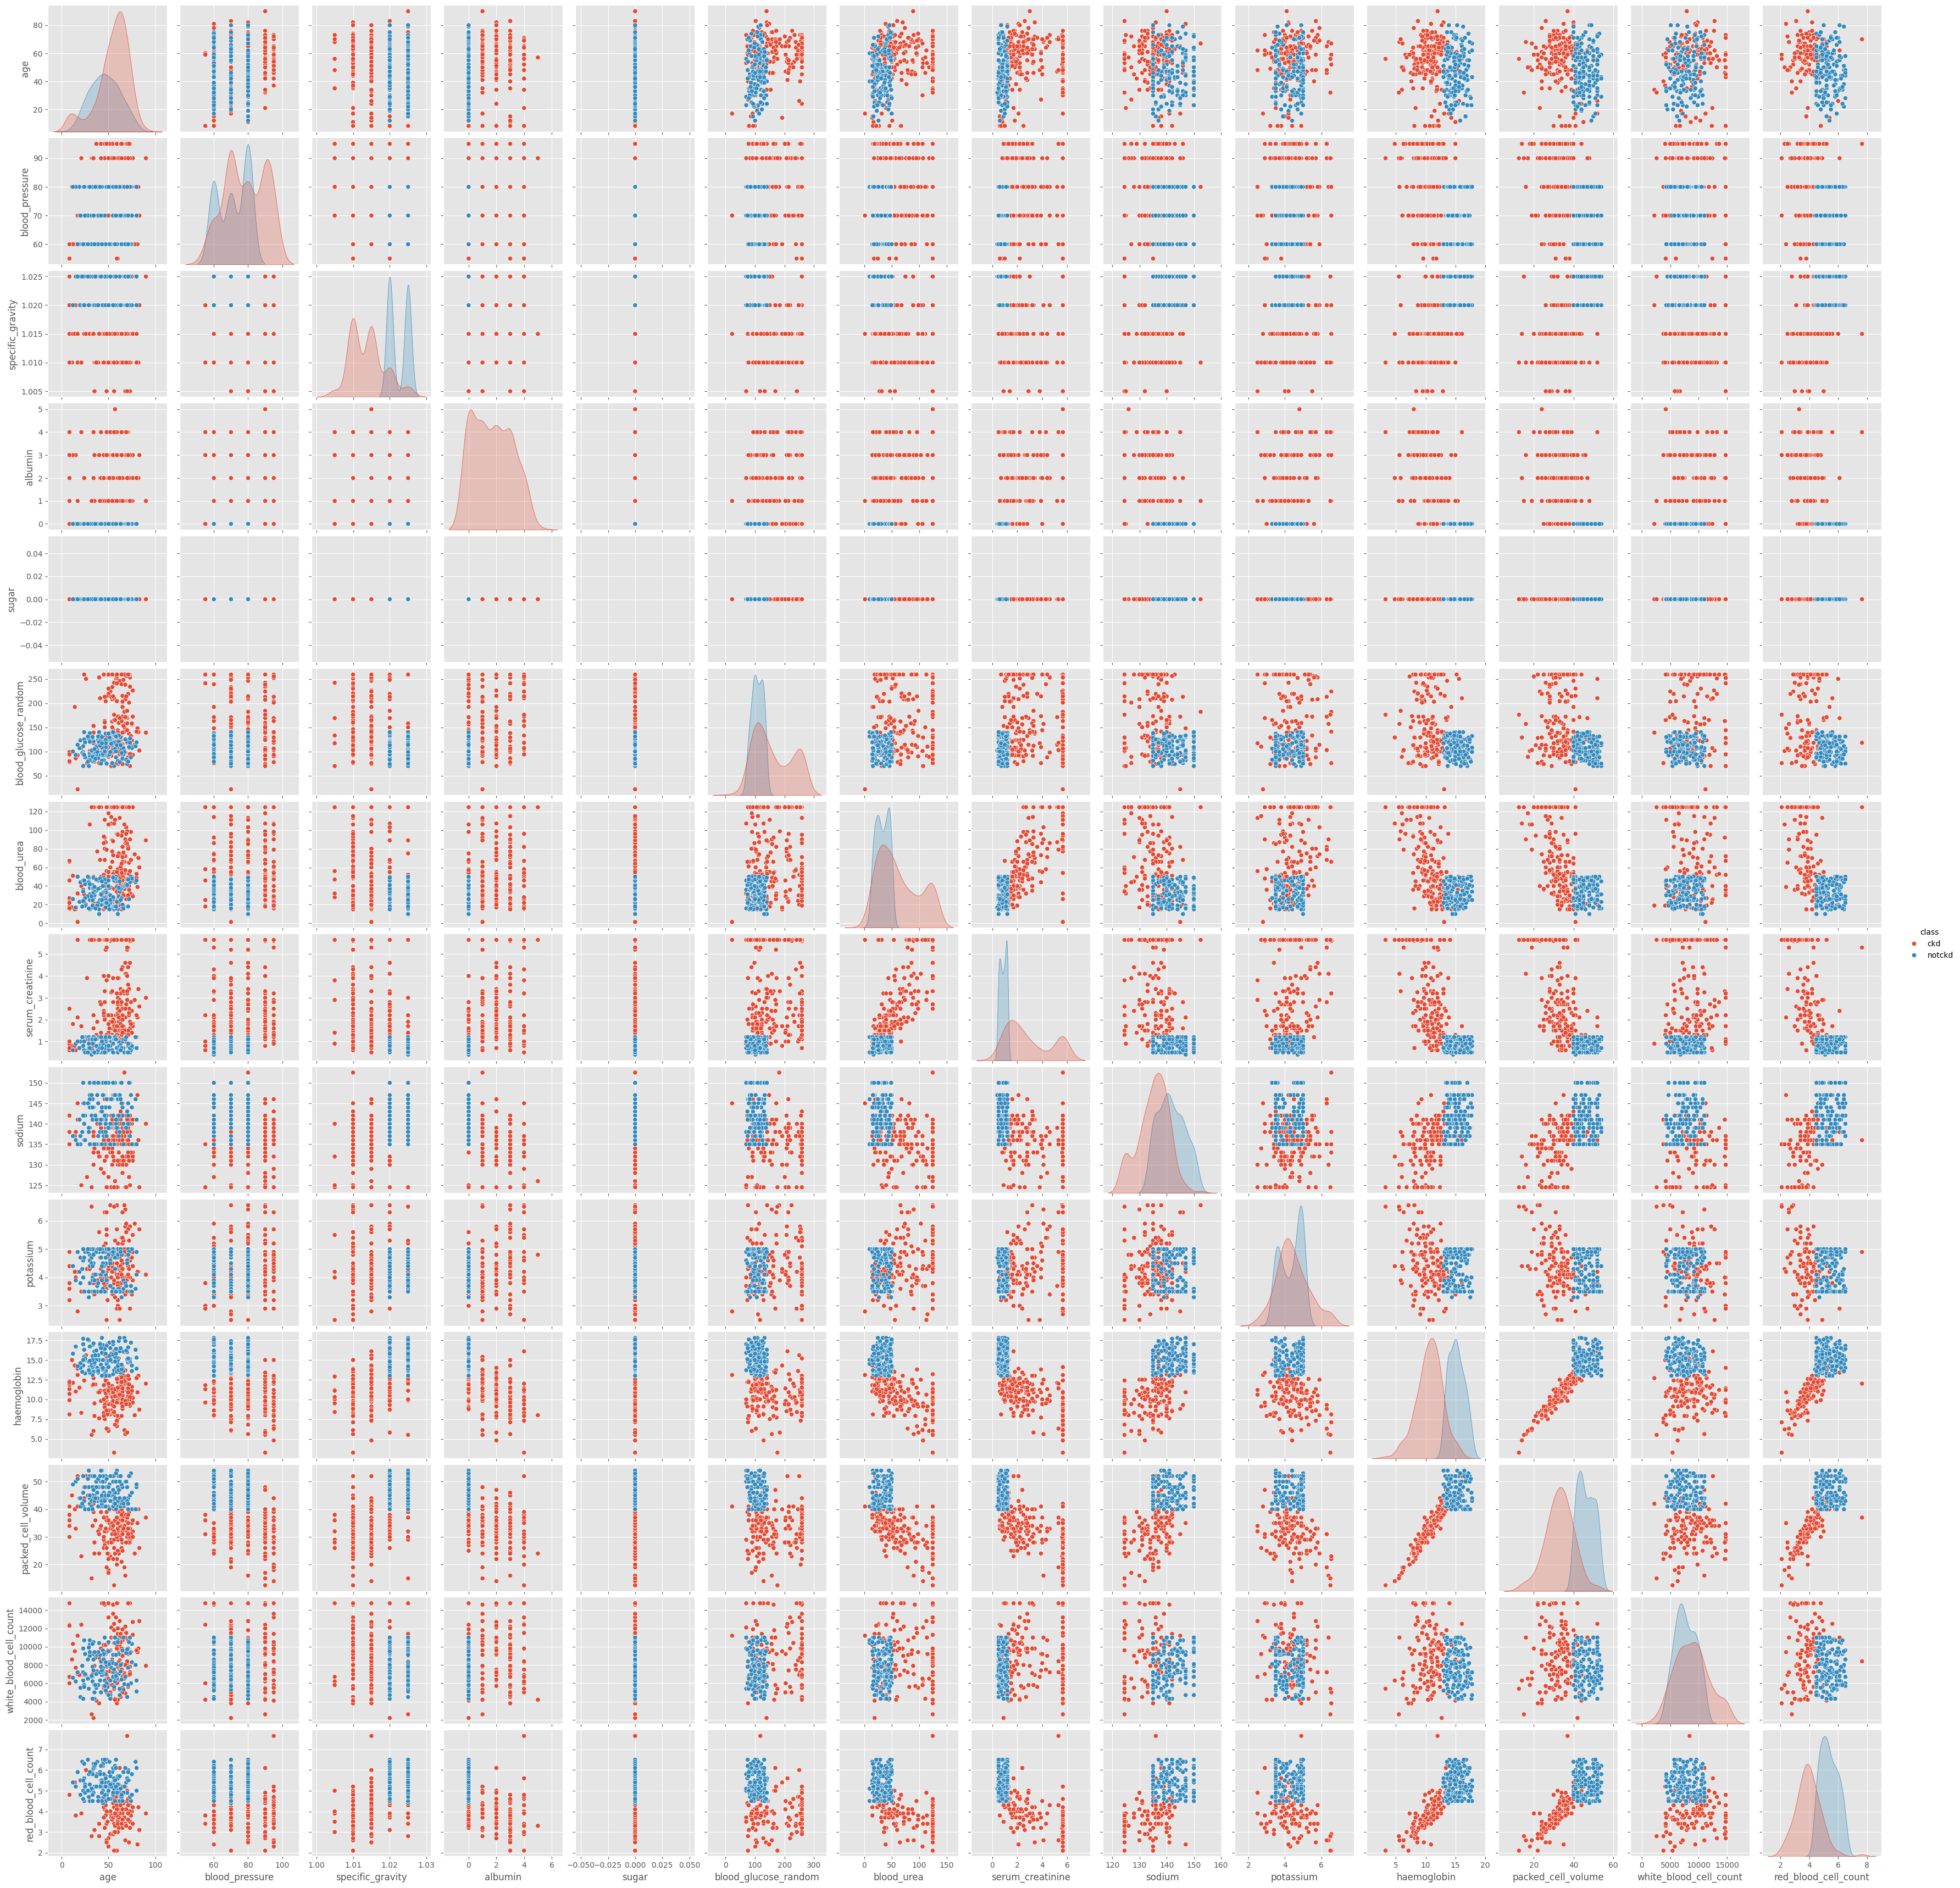

In [46]:
sns.pairplot(df[num_cols+ ["class"]], hue='class')

### Step 2: Handling Null values and correlation

In [48]:
from fancyimpute import IterativeImputer


In [49]:
mice_imputer= IterativeImputer()

In [51]:
pearson_corr['packed_cell_volume'].loc[pearson_corr['packed_cell_volume'].abs()>0.5]

specific_gravity        0.628586
albumin                -0.660795
blood_urea             -0.565069
serum_creatinine       -0.719067
sodium                  0.517838
haemoglobin             0.867755
packed_cell_volume      1.000000
red_blood_cell_count    0.764204
Name: packed_cell_volume, dtype: float64

In [52]:
imputed_cols= []
for col in num_cols:
    if col in imputed_cols:
        continue

    correlated_cols= pearson_corr[col].loc[pearson_corr[col].abs()>0.5].index.to_list()

    if correlated_cols:
        correlated_cols_to_impute= [c for c in correlated_cols if c not in imputed_cols]

        if correlated_cols_to_impute:
            imputation_data= df[correlated_cols_to_impute].copy()
            imputation_data = mice_imputer.fit_transform(imputation_data)

            df[correlated_cols_to_impute] = imputation_data

            imputed_cols.extend(correlated_cols_to_impute)

In [53]:
imputed_cols

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'serum_creatinine',
 'haemoglobin',
 'packed_cell_volume',
 'red_blood_cell_count',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'sodium',
 'potassium',
 'white_blood_cell_count']

In [54]:
set(num_cols)- set(imputed_cols)

set()

In [55]:
remaining_cat= df.columns[df.isnull().any()].to_list()
remaining_cat

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia']

In [56]:
for col in remaining_cat:
    if col in cat_cols:
        df[col]= df[col].fillna(df[col].mode()[0])

In [57]:
df.isnull().sum().sort_values(ascending=False)

age                        0
potassium                  0
aanemia                    0
peda_edema                 0
appetite                   0
coronary_artery_disease    0
diabetes_mellitus          0
hypertension               0
red_blood_cell_count       0
white_blood_cell_count     0
packed_cell_volume         0
haemoglobin                0
sodium                     0
blood_pressure             0
serum_creatinine           0
blood_urea                 0
blood_glucose_random       0
bacteria                   0
pus_cell_clumps            0
pus_cell                   0
red_blood_cells            0
sugar                      0
albumin                    0
specific_gravity           0
class                      0
dtype: int64

#### Outlier Handling

In [ ]:
for features in num_cols:
    Q1= df[features].quantile(0.25)
    Q3= df[features].quantile(0.75)
    IQR= Q3-Q1
    lower= Q1- 1.5* IQR
    upper= Q3 + 1.5 * IQR
    if df[df[features]>upper].any(axis=None):
        df.loc[df[features]>upper, features]=upper
    if df[df[features]<lower].any(axis=None):
        df.loc[df[features]<lower, features]=lower
    else:
        print(features,"no")

### Create Datasets

In [59]:
high_corr= [(col1,col2) for col1 in num_cols for col2 in num_cols if col1 !=  col2 and pearson_corr.loc[col1,col2]>0.7 ]
high_corr

[('blood_urea', 'serum_creatinine'),
 ('serum_creatinine', 'blood_urea'),
 ('haemoglobin', 'packed_cell_volume'),
 ('haemoglobin', 'red_blood_cell_count'),
 ('packed_cell_volume', 'haemoglobin'),
 ('packed_cell_volume', 'red_blood_cell_count'),
 ('red_blood_cell_count', 'haemoglobin'),
 ('red_blood_cell_count', 'packed_cell_volume')]

In [60]:
df_wo_corr = df.copy( deep=True)

In [61]:
for col1, col2 in high_corr:
    if col1 in df_wo_corr.columns:
        df_wo_corr= df_wo_corr.drop(columns=[col1])



In [65]:
print("new",df_wo_corr.columns.tolist() )
print("old",df.columns.tolist() )

new ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'sodium', 'potassium', 'white_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
old ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


In [64]:
print("new",len(df_wo_corr.columns.tolist()) )
print("old",len(df.columns.tolist()) )

new 20
old 25


In [68]:
cat_cols_wo_corr= [col for col in df_wo_corr.columns if df[col].dtype == 'object' ]
num_cols_wo_corr= [col for col in df_wo_corr.columns if df[col].dtype != 'object' ]

### Features Engineering

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest
from sklearn.preprocessing import LabelEncoder

In [67]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()}")

red_blood_cells has 2
pus_cell has 2
pus_cell_clumps has 2
bacteria has 2
hypertension has 2
diabetes_mellitus has 2
coronary_artery_disease has 2
appetite has 2
peda_edema has 2
aanemia has 2
class has 2


In [69]:
le = LabelEncoder()

for col in cat_cols_wo_corr:
    df_wo_corr[col]= le.fit_transform(df_wo_corr[col])

In [70]:
cat_cols_wo_corr.remove('class')

In [71]:
X= df_wo_corr.drop(columns=['class'])
y= df_wo_corr['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
encoder = OneHotEncoder(sparse_output= False,drop='first')
X_train_encoded= encoder.fit_transform(X_train[cat_cols_wo_corr])
X_test_encoded= encoder.fit_transform(X_test[cat_cols_wo_corr])

In [74]:
X_train_encoded_df=  pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(cat_cols_wo_corr))
X_test_encoded_df=  pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(cat_cols_wo_corr))

In [76]:
X_train_encoded_df.shape

(320, 10)

In [77]:
X_test_encoded_df.shape

(80, 10)

In [78]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols_wo_corr])
X_test_scaled = scaler.transform(X_test[num_cols_wo_corr])


In [79]:
# Create DataFrames from the scaled features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=num_cols_wo_corr)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=num_cols_wo_corr)

In [80]:
X_train_processed = pd.concat([X_train_scaled_df.reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_processed = pd.concat([X_test_scaled_df.reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [81]:
X_train_processed.shape

(320, 19)

In [83]:
k=10
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_kbest= selector.fit_transform(X_train_processed, y_train)

In [84]:
selected_features= X_train_processed.columns[selector.get_support(indices=True)]

In [85]:
selected_features

Index(['specific_gravity', 'albumin', 'blood_glucose_random', 'sodium',
       'potassium', 'white_blood_cell_count', 'hypertension_1',
       'diabetes_mellitus_1', 'peda_edema_1', 'aanemia_1'],
      dtype='object')

In [86]:
X_train_kbest_df= X_train_processed[selected_features].copy(deep=True)

In [87]:
X_train_kbest_df.shape

(320, 10)

In [88]:
X_test_kbest_df= X_test_processed[selected_features].copy(deep=True)

In [89]:
X_test_kbest_df.shape

(80, 10)

## PCA

In [90]:
from sklearn.decomposition import PCA

In [93]:
n_components = 10
 
pca= PCA(n_components=10)
X_train_pca= pca.fit_transform(X_train_processed)
X_test_pca= pca.fit_transform(X_test_processed)

In [94]:
# Create DataFrames for PCA-transformed data
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

print("Shape of training set with PCA-reduced features:", X_train_pca_df.shape)
print("Shape of test set with PCA-reduced features:", X_test_pca_df.shape)


Shape of training set with PCA-reduced features: (320, 10)
Shape of test set with PCA-reduced features: (80, 10)


In [95]:
X_train_pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.817393 -2.605547 -2.041193 -1.540462 -0.190369  0.241399  1.699760   
1   -2.132942  1.202181  0.809297 -0.434661 -1.254815 -0.172035 -1.681291   
2   -0.274045 -0.978220  0.414790  1.441783  1.903153  0.932070 -0.182356   
3    0.105166  0.428560  0.011443 -0.358328  0.606964 -0.541631 -1.505447   
4    1.188288  0.681132 -0.454339 -0.673590 -0.101217 -1.021896 -0.160990   
..        ...       ...       ...       ...       ...       ...       ...   
315  0.034100 -1.364246  2.490688 -1.119944  0.159846 -0.303325 -0.157612   
316 -2.055114  0.084761 -2.207532 -0.661871  1.127054  0.205383  0.615754   
317  1.693651  1.021623 -0.328639 -0.356510 -0.617803 -0.823671  0.201126   
318  1.747821  1.039920 -0.113751 -0.730942 -0.960719 -0.105809  0.715123   
319  1.920305 -0.989837 -0.369303  0.016319  0.169474 -0.897319  0.460288   

          PC8       PC9      PC10  
0    0.113649 -0.432019  0.458654  
1    0.642103  0.431498 -0.319914  
2   -0.736039  0.021268 -0.157164  
3    0.410855 -0.121253 -0.008391  
4   -0.068535  0.132916  0.031221  
..        ...       ...       ...  
315 -0.802257  0.584644 -0.355944  
316 -0.283134  0.691018 -0.314828  
317  0.335073  0.175811 -0.109245  
318 -0.033902  0.088711 -0.060412  
319 -1.043502  0.144473  0.278411  

[320 rows x 10 columns]

In [97]:
pca.explained_variance_.sum()

6.970041713296379

### Modeling

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [100]:
# Function for model evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Get predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Train and test accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Print accuracy and classification report
    print(f"\n{model_name} - Train Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    print(f"Classification Report (Test):\n{classification_report(y_test, y_test_pred)}")

    # Plot confusion matrix
 #   ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
 #   plt.title(f"{model_name} - Confusion Matrix (Test)")
 #   plt.show()
    
    return train_acc, test_acc

In [101]:
# Function to plot ROC-AUC curve
def plot_roc_auc(model, X_test, y_test, model_name):
    y_score = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-AUC curve for {model_name}')
    plt.legend()
    plt.show()

In [102]:
# Function to plot combined ROC-AUC curves for multiple models
def plot_combined_roc_auc(models, X_test, y_test, section_title):
    plt.figure(figsize=(10, 8))
    for model_name, model in models.items():
        y_score = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Combined ROC-AUC Curve for {section_title}')
    plt.legend()
    plt.show()


*** Running Models on X_train_processed and X_test_processed ***

Logistic Regression - Train Accuracy: 0.99, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



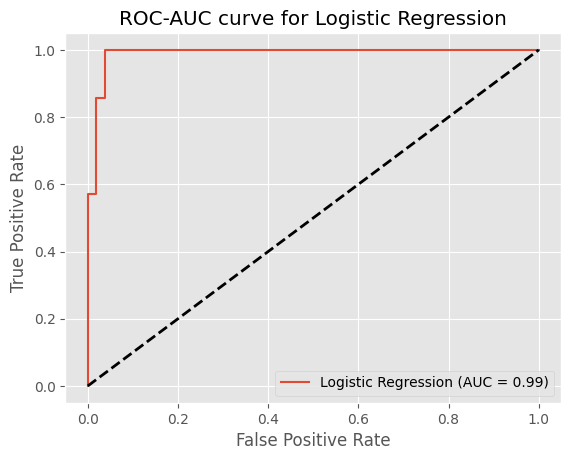


Support Vector Classifier - Train Accuracy: 1.00, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



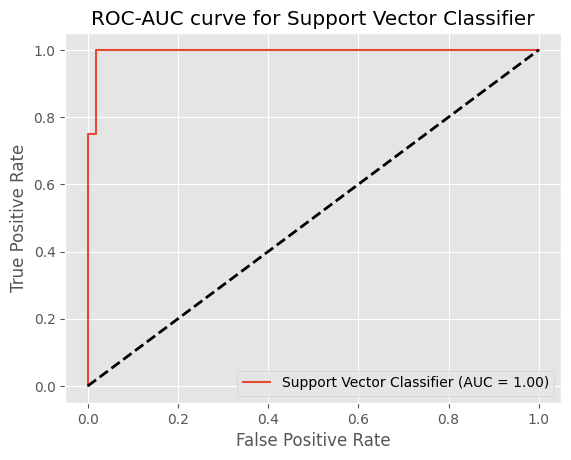


Decision Tree - Train Accuracy: 0.99, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



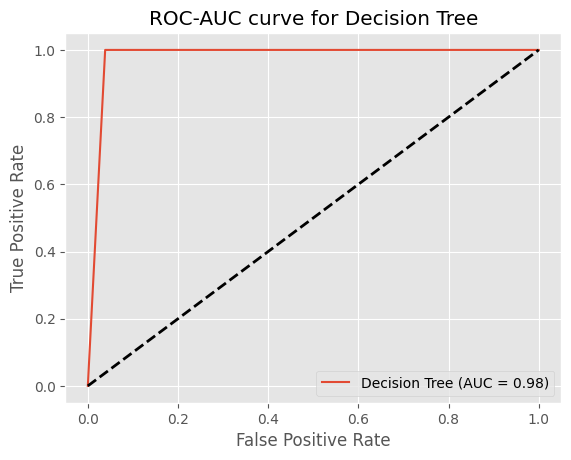


Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.99
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



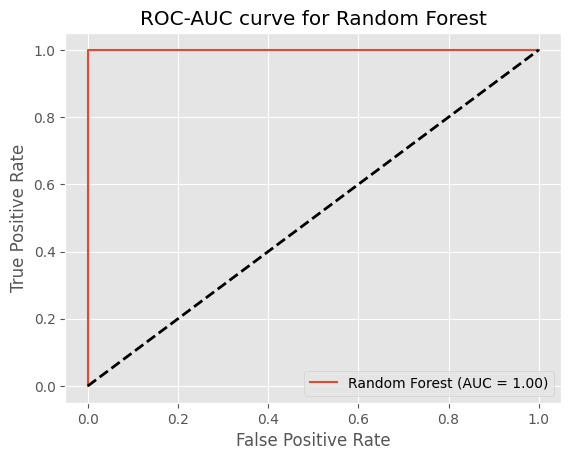


Gradient Boosting - Train Accuracy: 0.99, Test Accuracy: 0.99
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



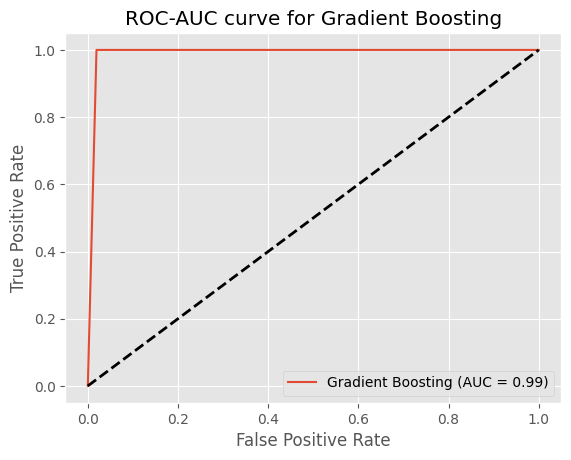


XGBoost - Train Accuracy: 0.98, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



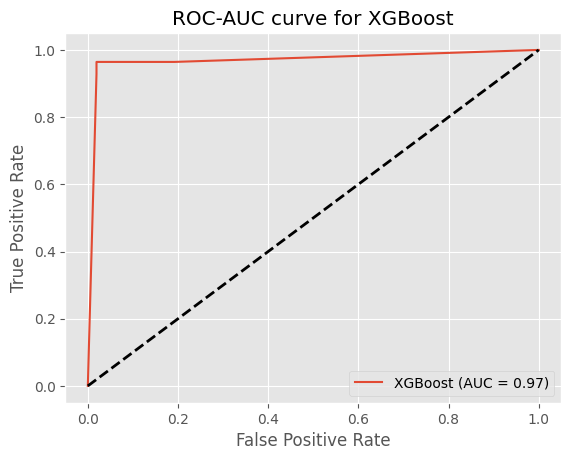

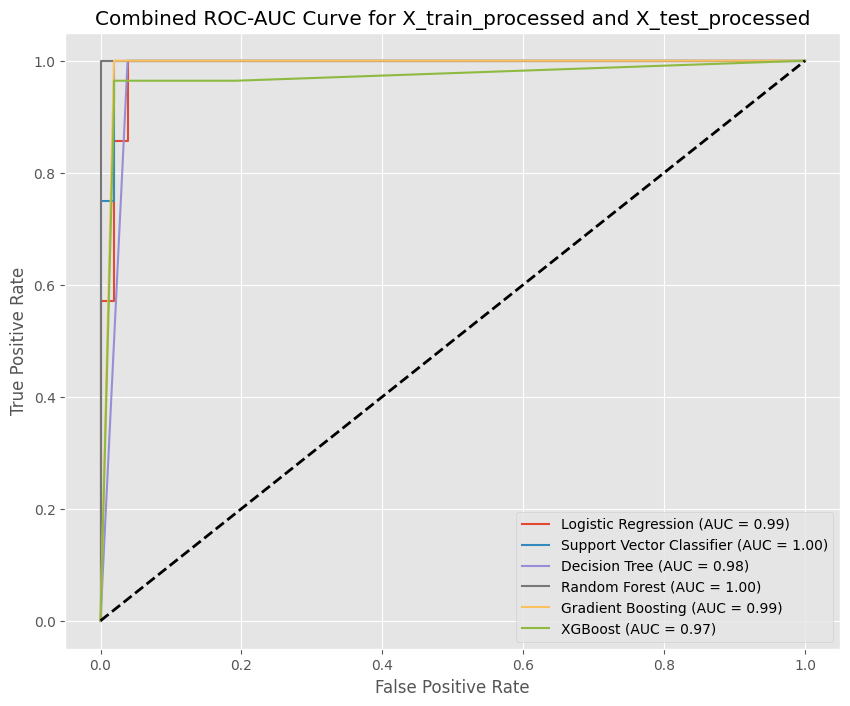

In [103]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

param_grids = {
    "Logistic Regression": {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']},
    "Support Vector Classifier": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Decision Tree": {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100], 'max_depth': [10, 15], 'min_samples_split': [2, 5]},
    "Gradient Boosting": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100]},
    "XGBoost": {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100], 'max_depth': [3, 5]}
}
trained_models = {}
print("\n*** Running Models on X_train_processed and X_test_processed ***")
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_processed, y_train)
    best_model = grid.best_estimator_
    trained_models[model_name] = best_model 

    train_acc, test_acc = evaluate_model(best_model, X_train_processed, X_test_processed, y_train, y_test, model_name)
    plot_roc_auc(best_model, X_test_processed, y_test, model_name)
# Plot combined ROC-AUC for all models in Section 1
plot_combined_roc_auc(trained_models, X_test_processed, y_test, "X_train_processed and X_test_processed")


*** Running Models on X_train_kbest_df and X_test_kbest_df ***

Logistic Regression - Train Accuracy: 0.99, Test Accuracy: 0.96
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        52
           1       0.90      1.00      0.95        28

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



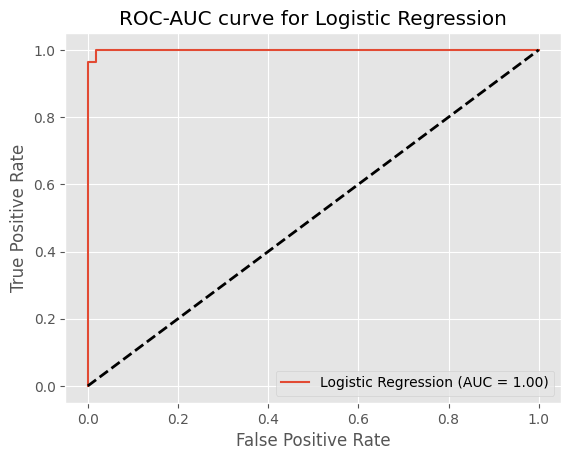


Support Vector Classifier - Train Accuracy: 0.99, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



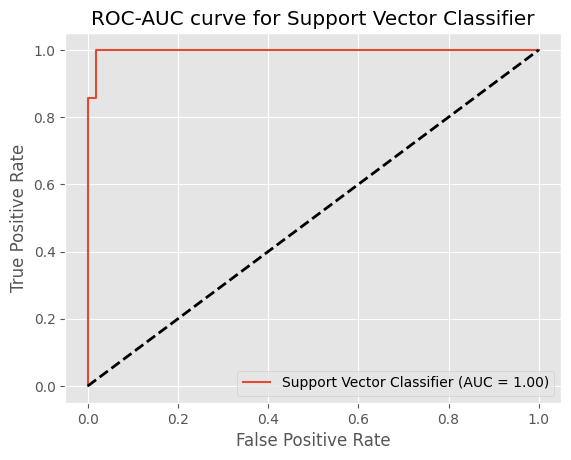


Decision Tree - Train Accuracy: 0.99, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           1       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



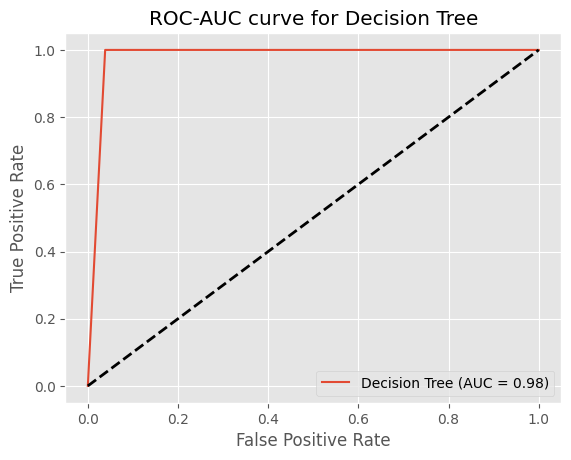


Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.99
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



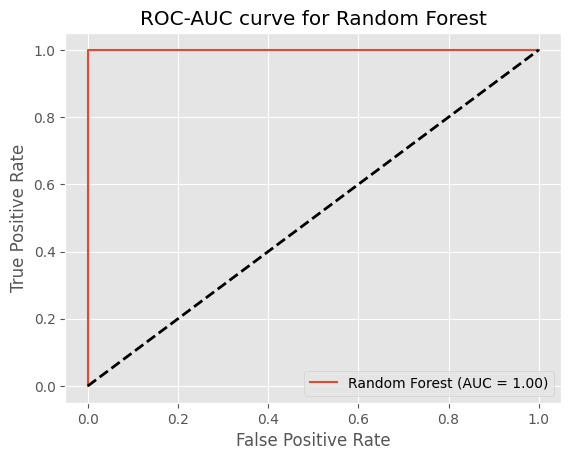


Gradient Boosting - Train Accuracy: 0.99, Test Accuracy: 0.99
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



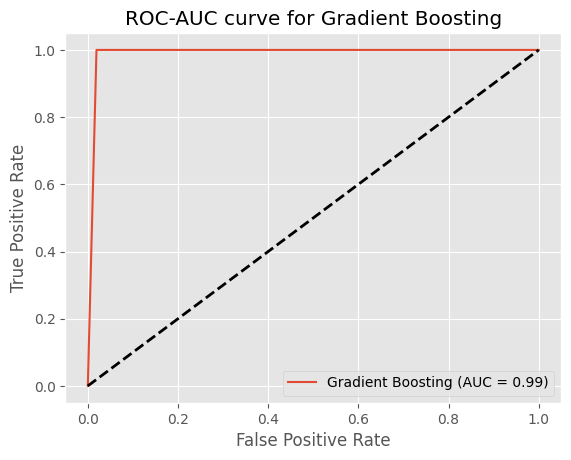


XGBoost - Train Accuracy: 0.98, Test Accuracy: 0.97
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



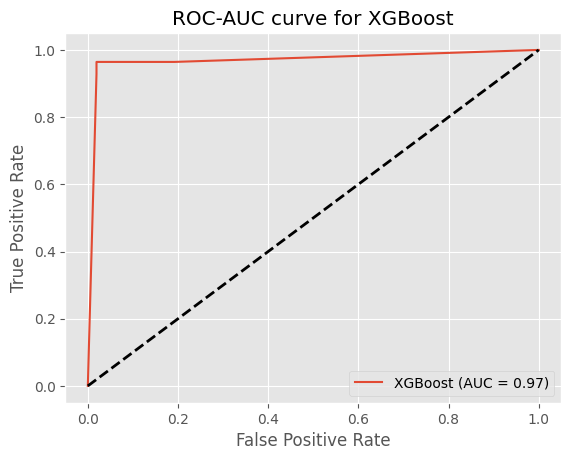

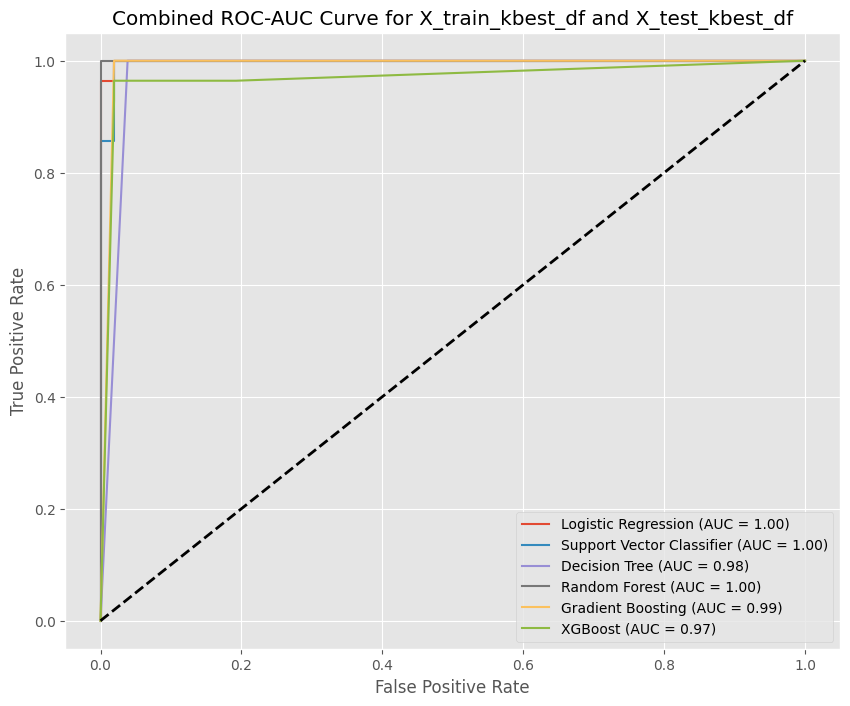

In [104]:
print("\n*** Running Models on X_train_kbest_df and X_test_kbest_df ***")
trained_models = {}
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_kbest_df, y_train)
    best_model = grid.best_estimator_
    trained_models[model_name] = best_model  # Store the best model for later ROC-AUC plotting
    train_acc, test_acc = evaluate_model(best_model, X_train_kbest_df, X_test_kbest_df, y_train, y_test, model_name)
    plot_roc_auc(best_model, X_test_kbest_df, y_test, model_name)

# Plot combined ROC-AUC for all models in Section 2
plot_combined_roc_auc(trained_models, X_test_kbest_df, y_test, "X_train_kbest_df and X_test_kbest_df")


*** Running Models on X_train_pca_df and X_test_pca_df ***

Logistic Regression - Train Accuracy: 0.99, Test Accuracy: 0.88
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.88      0.75      0.81        28

    accuracy                           0.88        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.88      0.88      0.87        80



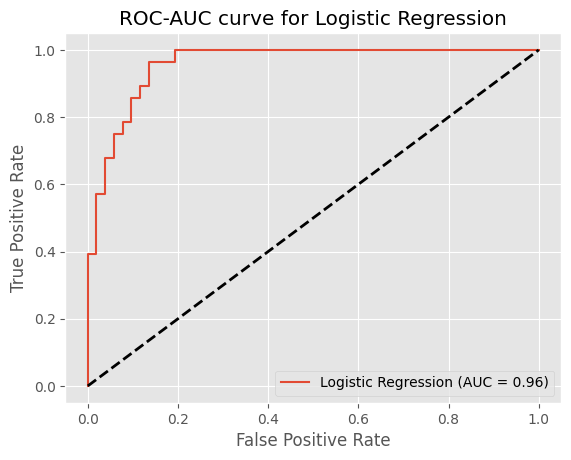


Support Vector Classifier - Train Accuracy: 1.00, Test Accuracy: 0.84
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        52
           1       0.83      0.68      0.75        28

    accuracy                           0.84        80
   macro avg       0.83      0.80      0.81        80
weighted avg       0.84      0.84      0.83        80



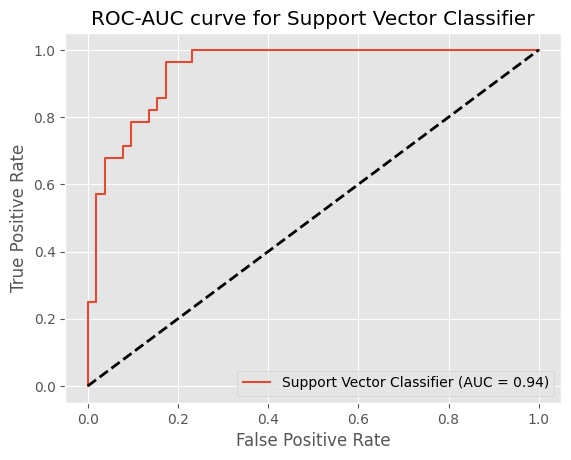


Decision Tree - Train Accuracy: 1.00, Test Accuracy: 0.89
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



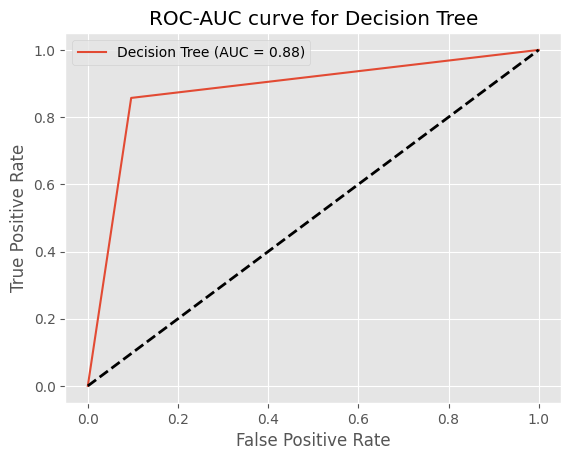


Random Forest - Train Accuracy: 1.00, Test Accuracy: 0.94
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



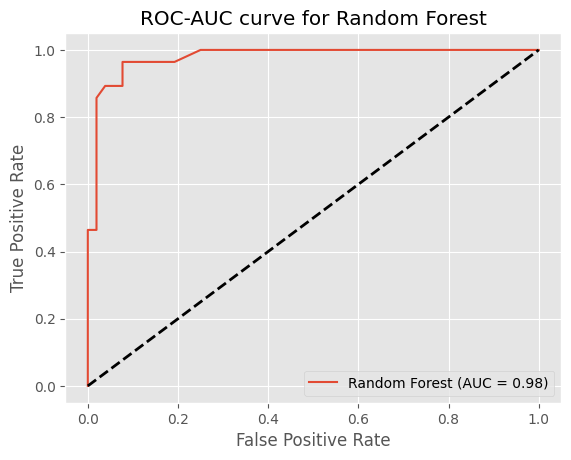


Gradient Boosting - Train Accuracy: 0.99, Test Accuracy: 0.88
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        52
           1       0.80      0.86      0.83        28

    accuracy                           0.88        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.88      0.88      0.88        80



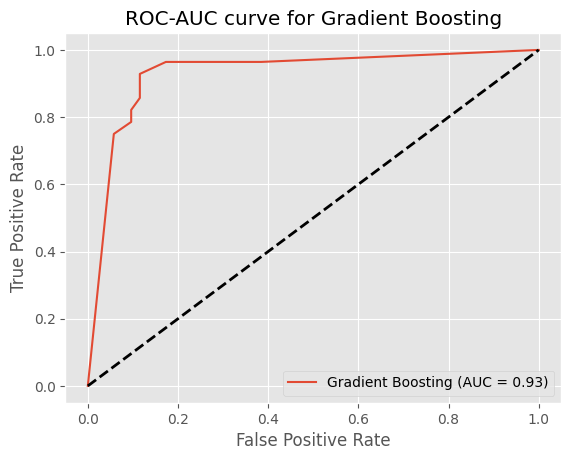


XGBoost - Train Accuracy: 1.00, Test Accuracy: 0.89
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        52
           1       0.81      0.89      0.85        28

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



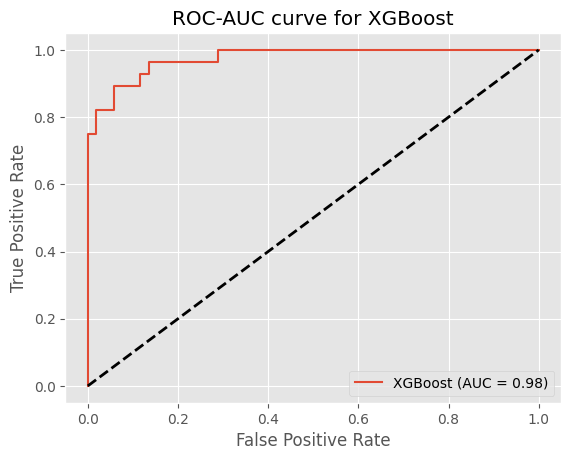

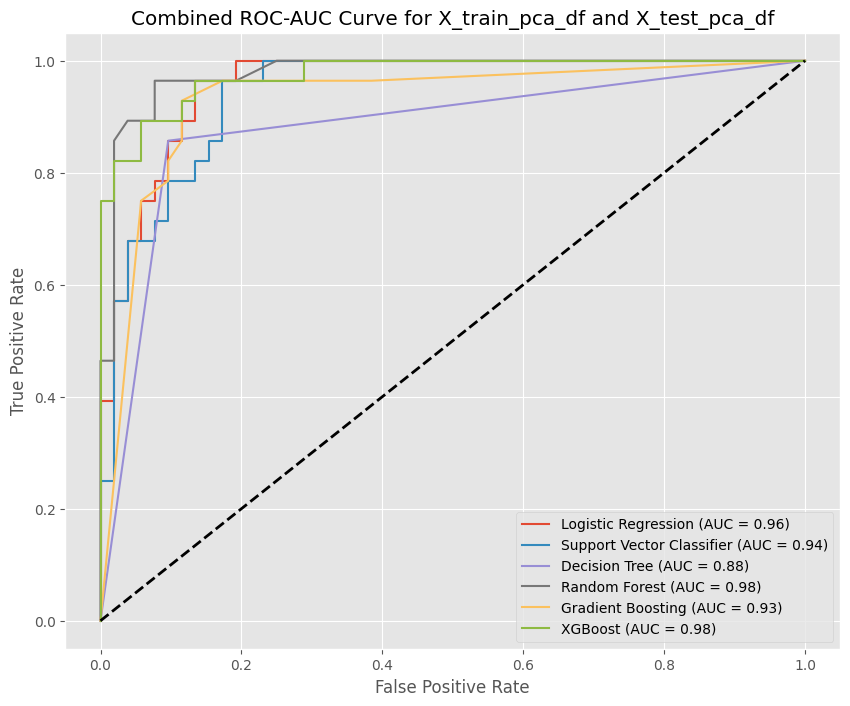

In [105]:
print("\n*** Running Models on X_train_pca_df and X_test_pca_df ***")
for model_name, model in models.items():
    grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_pca_df, y_train)
    best_model = grid.best_estimator_
    trained_models[model_name] = best_model  # Store the best model for later ROC-AUC plotting

    train_acc, test_acc = evaluate_model(best_model, X_train_pca_df, X_test_pca_df, y_train, y_test, model_name)
    plot_roc_auc(best_model, X_test_pca_df, y_test, model_name)
    
# Plot combined ROC-AUC for all models in Section 3
plot_combined_roc_auc(trained_models, X_test_pca_df, y_test, "X_train_pca_df and X_test_pca_df")